In [1]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("asm_full_opt")
from phase_mask import PhaseMask
from asm_prop import ASMPropagator
import config

In [2]:
asm = ASMPropagator(config)

phase = PhaseMask(
    config,
    init="hyperbolic",
    X=asm.X,
    Y=asm.Y,
    wrap_phase=False,    
    test_orientation=True,
)



torch.Size([1, 255, 255])
torch.Size([1, 255, 255])


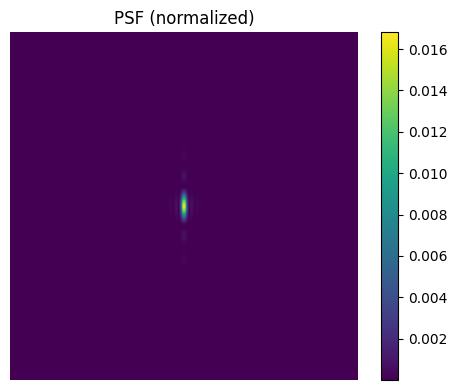

In [3]:

with torch.no_grad():
    psf, Uz = asm(phase_mask=phase, normalize=True, return_field=True)

psf0 = psf.detach().cpu()
print(Uz.shape)
print(psf.shape)

plt.figure(figsize=(5, 4))
plt.imshow((psf0[0]).T, origin="lower", cmap="viridis")
plt.title("PSF (normalized)")
plt.colorbar()
plt.axis("off")
plt.tight_layout()
plt.show()



In [4]:
phase_array = PhaseMask(
    config,
    num_masks=16,
    init="hyperbolic",
    defocus_max=20e-6,
    X=asm.X,
    Y=asm.Y,
    wrap_phase=False,    
    test_orientation=True,
)


with torch.no_grad():
    psfs, Uz = asm(phase_mask=phase_array, normalize=True, return_field=True)

psf0 = psfs.detach().cpu()
print(Uz.shape)
print(psfs.shape)

torch.Size([16, 255, 255])
torch.Size([16, 255, 255])


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_psf_stack(psfs, title="PSF stack"):
    """
    Plot a stack of PSFs of shape (K, N, N) in a grid.
    """
    psfs = psfs.detach().cpu().numpy()
    K, N, _ = psfs.shape

    grid_size = int(math.ceil(math.sqrt(K)))

    fig, axes = plt.subplots(
        grid_size,
        grid_size,
        figsize=(3 * grid_size, 3 * grid_size),
        constrained_layout=True,
    )

    axes = np.atleast_2d(axes)

    vmax = psfs.max()  # consistent color scaling

    for k in range(grid_size * grid_size):
        ax = axes[k // grid_size, k % grid_size]

        if k < K:
            im = ax.imshow(
                psfs[k].T,
                origin="lower",
                cmap="inferno",
                vmin=0,
                vmax=vmax,
            )
            ax.set_title(f"PSF {k}")
        else:
            ax.axis("off")

        ax.set_xticks([])
        ax.set_yticks([])

    fig.colorbar(im, ax=axes, shrink=0.85, label="Intensity")
    fig.suptitle(title, fontsize=14)
    plt.show()


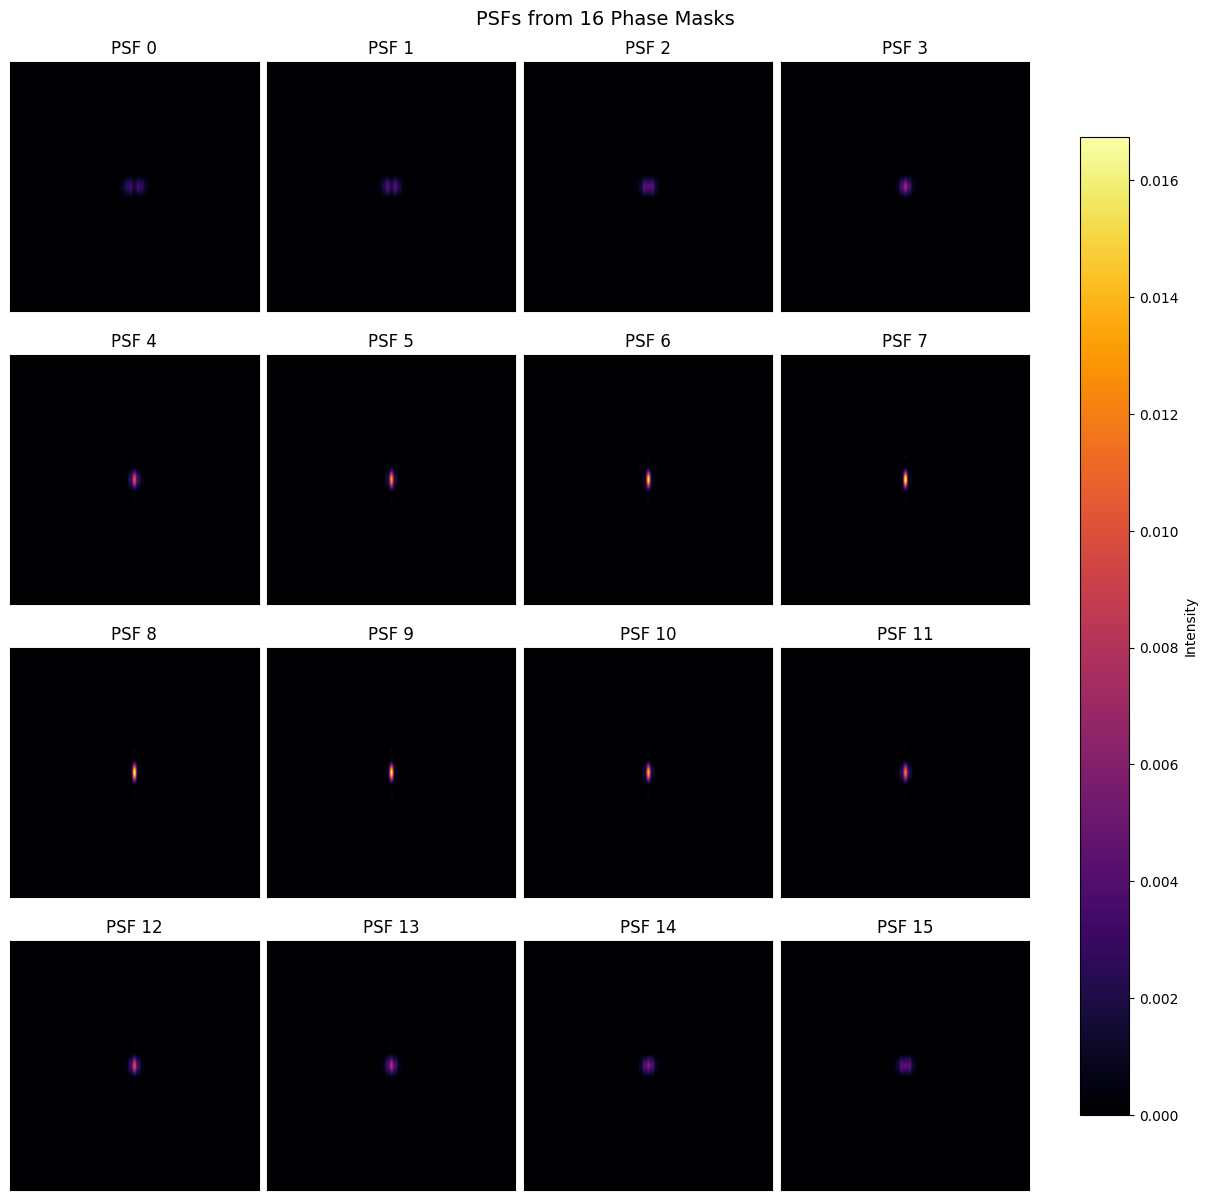

In [6]:
plot_psf_stack(psfs, title="PSFs from 16 Phase Masks")
